In [1]:
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
import numpy as np
import re
import plotly.express as px
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import requests
import geopandas as gpd
from cartoframes.viz import Map, Layer, popup_element
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
import json
import os
from dotenv import load_dotenv

## Calling the service MongoDB

In [2]:
client = MongoClient("localhost:27017")

In [3]:
db = client["Ironhack"]

In [4]:
comp = db.get_collection("companies")

## Checking the weight of each kind of professionals into the company

In [5]:
import src.professionals_1 as pf

In [6]:
df = pf.prof_data_frame()

In [7]:
fig = px.bar(df, y="percentage", x="group_name", color='group_name', barmode="group", title= 'Percentage of the staff',height=600)
fig.update_traces(width=1)
fig.show()

## Querying in Mongos DB


In [8]:
import src.query_2 as qr

### Filtering throught regex

In [9]:
filter_= qr.regex()

### Getting the projection to do the query 1: top ten cities according to our requirements

In [10]:
projection= qr.project_()

In [11]:
filt_list = list(comp.find(filter_, projection))


In [12]:
df_top10_city= qr.figure_city(filt_list)
df_top10_city
df_top10_city.to_csv("data/top_ten.csv")

In [13]:
fig_city= qr.fig_city(df_top10_city)
fig_city

### Query 2: companies raise more than $ 1M

In [14]:
filter_ = {'total_money_raised': {"$regex":'(M)'}}

In [15]:
filt_list = list(comp.find(filter_, projection))

In [16]:
df_name = qr.company_df(filt_list)
df_name

,name,amount,currency,us$_value_per_M
0,SurveyMonkey,965.0,$,965.000000
1,LivingSocial,935.0,$,935.000000
2,Zynga,860.0,$,860.000000
3,BrightSource Energy,845.0,$,845.000000
4,Better Place,836.0,$,836.000000
...,...,...,...,...
4025,LoiLo,110.0,¥,0.837153
4026,Aftercad Software,1.1,C$,0.823232
4027,Mobovivo,1.0,C$,0.748393
4028,Wellocities,1.0,C$,0.748393


In [17]:
fig_raised = qr.fig_raised(df_name)

In [18]:
df_count= qr.count_df(df_name)

In [19]:
fig_companies_currencies= qr.co_curr(df_count)

In [20]:
fig_top_ten= qr.top_ten(df_name)

In [21]:
companies_location = qr.location()
projection_1 = {'offices.city':1, 'offices.state':1,'offices.country':1,'offices.address':1,'_id':0}

In [22]:
flt = list(comp.find(companies_location, projection_1)) 

In [23]:
df_cc= qr.city_list(flt)

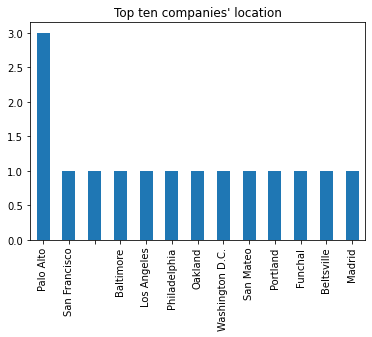

In [24]:
fig_= qr.top_ten_fig(df_cc)


## Checking the ubications

In [25]:
import src.ubications_3 as ubc

In [26]:
address= ubc.palo_alto_address()
address

,address1,city
0,3500 Deer Creek rd.,Palo Alto
1,365 Vermont St.,San Francisco
5,"1070 Arastradero Road,",Palo Alto
7,285 Hamilton Avenue,Palo Alto


In [27]:
df_coordinates = ubc.lst_coordinates()
df_coordinates

,name,lat,lon
0,Tesla,37.394278,-122.152007
1,Better Place,37.394264,-122.149029
2,SurveyMonkey,37.445102,-122.162979
3,Zynga,37.764760,-122.406779


In [28]:
palal_map = ubc.map_palo_alto()


In [29]:
palal_map= ubc.map_places(df_coordinates)
palal_map

## Criteria to meet the ubications
 - Starbucks in range of 500m
 - Bus-stop in range of 1000m
 - Parking in range of 500m
 - Airport in range of 50km
 - Schools in range of 5km
 - Vegetarian/Vegan Restaurantes in range of 500m
 - Basketball court in range of 10km

### Prerequisites

In [30]:
load_dotenv()

True

In [31]:
token = os.getenv('token')

In [32]:
import src.requirements_4 as ft

### Criteria Zynga co. ubication

In [33]:
lat= 37.764760
lon= -122.406779

In [34]:
starbucks_zynga = ft.st_b_zn(lat,lon,token)
bus_stop_zynga  = ft.bs_st_zn(lat,lon,token) 
parking_zynga   = ft.park(lat,lon,token)
airport_zynga   = ft.airport(lat,lon,token)
school_zynga    = ft.schools(lat,lon,token)
restaurant_zynga= ft.restaurant(lat,lon,token)
basketball_zynga= ft.basketball(lat,lon,token)

In [35]:
df_zg = ft.def_zn(starbucks_zynga,bus_stop_zynga,parking_zynga,airport_zynga,school_zynga,restaurant_zynga,basketball_zynga)
df_zg

,name,lat,lon,distance (m)
0,Starbucks,37.766742,-122.409414,329
1,De Haro & Mariposa,37.763080,-122.401744,477
2,San Francisco International Airport (SFO),37.624123,-122.395506,16537
3,City College of San Francisco Mission Campus,37.755083,-122.420049,1589
4,Tower Valet Parking,37.765086,-122.402865,352
5,Next Level Burger Potrero Hill,37.764652,-122.402801,349
6,Berry Basketball Courts,37.772031,-122.397898,1111


### Criteria Survey Monkey co. ubication

In [36]:
lat = 37.445102
lon = -122.162979

In [37]:
starbucks_sm = ft.st_b_zn(lat,lon,token)
bus_stop_sm  = ft.bs_st_zn(lat,lon,token) 
parking_sm   = ft.park(lat,lon,token)
airport_sm   = ft.airport(lat,lon,token)
school_sm    = ft.schools(lat,lon,token)
restaurant_sm= ft.restaurant(lat,lon,token)
basketball_sm= ft.basketball(lat,lon,token)

In [38]:
df_sm = ft.def_zn(starbucks_sm,bus_stop_sm,parking_sm,airport_sm,school_sm,restaurant_sm,basketball_sm)
df_sm

"This place doesn't meet the criteria"

### Criteria Better Place co. ubication

In [39]:
lat = 37.394264
lon = -122.149029

In [40]:
starbucks_bp = ft.st_b_zn(lat,lon,token)
bus_stop_bp  = ft.bs_st_zn(lat,lon,token) 
parking_bp   = ft.park(lat,lon,token)
airport_bp   = ft.airport(lat,lon,token)
school_bp    = ft.schools(lat,lon,token)
restaurant_bp= ft.restaurant(lat,lon,token)
basketball_bp= ft.basketball(lat,lon,token)

In [41]:
df_bp = ft.def_zn(starbucks_bp,bus_stop_bp,parking_bp,airport_bp,school_bp,restaurant_bp,basketball_bp)
df_bp

,0
0,This place is not in within our criteria
1,This place is not in within our criteria
2,{'name': 'San Francisco International Airport ...
3,"{'name': 'Pinewood School - Upper Campus', 'la..."
4,This place is not in within our criteria
5,This place is not in within our criteria
6,{'name': 'Pogoseat with Stanford Cardinal Bask...


### Criteria Tesla co. ubication

In [42]:
lat = 37.394278
lon = -122.152007

In [43]:
starbucks_tl = ft.st_b_zn(lat,lon,token)
bus_stop_tl  = ft.bs_st_zn(lat,lon,token) 
parking_tl   = ft.park(lat,lon,token)
airport_tl   = ft.airport(lat,lon,token)
school_tl    = ft.schools(lat,lon,token)
restaurant_tl= ft.restaurant(lat,lon,token)
basketball_tl= ft.basketball(lat,lon,token)

In [44]:
df_tl = ft.def_zn(starbucks_tl,bus_stop_tl,parking_tl,airport_tl,school_tl,restaurant_tl,basketball_tl)
df_tl

,0
0,This place is not in within our criteria
1,This place is not in within our criteria
2,{'name': 'San Francisco International Airport ...
3,"{'name': 'Pinewood School - Upper Campus', 'la..."
4,This place is not in within our criteria
5,This place is not in within our criteria
6,{'name': 'Pogoseat with Stanford Cardinal Bask...


## Zynga place meets the criteria:
- Also, the company moved after being bought in 2022, so, the place is currently free

In [45]:
import src.cleaning_map_5 as cdm

In [46]:
df_all= cdm.data_together( df_coordinates, df_zg)

In [47]:
df_all
df_all.to_csv("data/distance_zynga.csv")

In [48]:
sf_map= cdm.points(df_all)

In [49]:
sf_map